# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,\
classification_report,roc_auc_score,roc_curve,precision_score,recall_score

# Loading iris dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
df = data.frame

# Splitting dataset for training and testing

In [3]:
X = df.drop("target",axis=1)
y = df["target"]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 101,test_size=0.25)

# defining hyper parameters for Grid Search

In [6]:
model = DecisionTreeClassifier()
parameters = {
    "max_depth":[None,1,3,5],
    "min_samples_split":[2,5,10],
    "criterion":['gini','entropy','log_loss']
}

# Training GridSearchCV to find best parameters

In [7]:
grid = GridSearchCV(model,param_grid=parameters,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [8]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

In [9]:
best_model = DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_split=2)
best_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Plotting splitting of tree

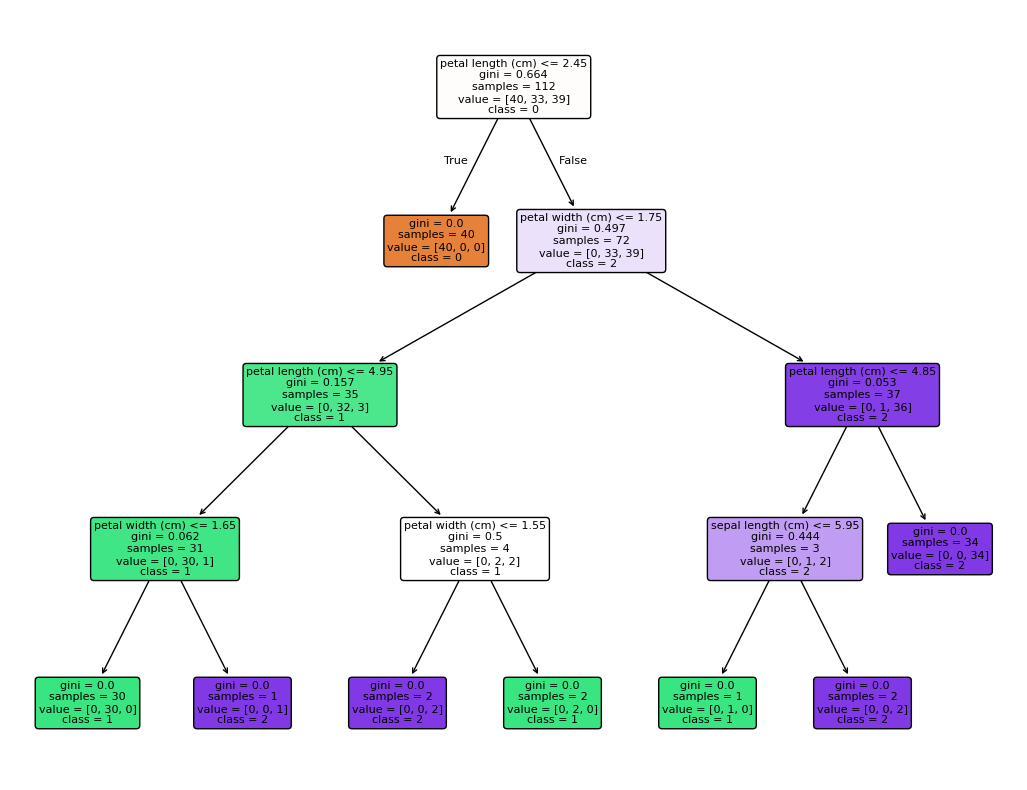

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(13,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['0','1','2'],
    filled = True,rounded = True
)
plt.show()

# Model Evaluation

In [13]:
y_pred = best_model.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

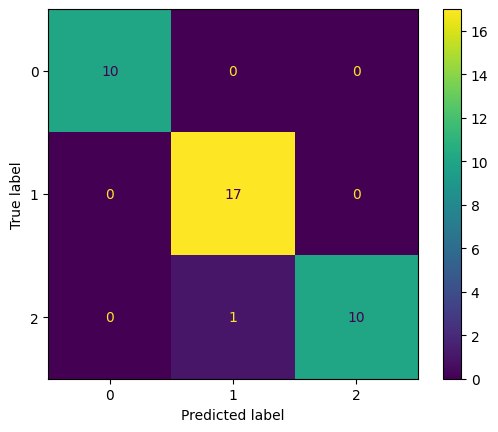

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()